# Gradiant Boosting Classification

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.DataFrame()
df['name']=['Alex','Brunei','Candy','David','Eric','Felicity']
df['age']=[12,87,44,19,32,14]
df['favorite_color']=['Blue','Green','Blue','Red','Green','Blue']
df['LovesTroll2']=['Yes','Yes','No','No','Yes','Yes']
display(df)

X=df[['age','gender']].copy()
X['Blue']=0
X.loc[df]
X['Green']=0
X['Red']=0

y=df['weight']
display(X)

n=df.shape[0]

## Load data

In [2]:
cancer=load_breast_cancer()
n_samples = len(cancer.target)
X = cancer.data
y = cancer.target
total=len(y)
has_cancer=np.sum(y)
no_cancer=total-has_cancer
print(f'{has_cancer} out of {total} persons have cancer')
print(f'features {X.shape[1]}')

357 out of 569 persons have cancer
features 30


## Step 1 Log of Odds

In [3]:
log_of_odds0=np.log(has_cancer / no_cancer)
probability0=np.exp(log_of_odds0)/(np.exp(log_of_odds0)+1)
print(f'the log_of_odds is : {log_of_odds0}')
print(f'the probability is : {probability0}')
predict0=1

the log_of_odds is : 0.5211495071076265
the probability is : 0.6274165202108963


## Step 2 For Loop

In [4]:
#explore
residuals0=y - probability0
loss0=-(y*np.log(probability0)+(1-y)*np.log(1-probability0))
print(f'loss is {loss0.sum()}')
loss0=-y * log_of_odds0 + np.log(1+np.exp(log_of_odds0))
print(f'loss is {loss0.sum()}')

tree0 = DecisionTreeRegressor(max_depth=1)
tree0.fit(X, residuals0)
stem = tree0.tree_

leaf_index=tree0.apply(X)
#for leaf 1
n_leaf1=len(leaf_index[leaf_index==1])
previous_probability1 = np.array([probability0] * n_leaf1)
denominator1 = np.sum(previous_probability1 * (1-previous_probability1))
gamma1 = stem.value[1][0][0] * n_leaf1 / denominator1
print(f'gamma1 {gamma1}')
#for leaf 2
n_leaf2=len(leaf_index[leaf_index==2])
previous_probability2 = np.array([probability0] * n_leaf2)
denominator2 = np.sum(previous_probability2 * (1-previous_probability2))
gamma2 = stem.value[2][0][0] * n_leaf2 / denominator2
print(f'gamma2 {gamma2}')

gamma_value=[gamma1, gamma2]
gamma = np.array([gamma_value[index-1] for index in leaf_index])
new_log_of_odds = log_of_odds0 + 0.1 * gamma
new_loss=-y * new_log_of_odds + np.log(1+np.exp(new_log_of_odds))
print(f'new loss is {new_loss.sum()}')

loss is 375.7200026920845
loss is 375.72000269208445
gamma1 1.221364201577474
gamma2 -2.4363001705150813
new loss is 338.13703383104206


In [5]:
#now let's get started
n_times = 20
learning_rate=0.1
log_of_odds=np.zeros([n_times+1,n_samples])

residuals = np.zeros([n_times+1,n_samples])
loss = [0] * (n_times+1)
prediction = np.zeros([n_times+1,n_samples])
score = np.zeros([n_times+1])
#calculation
log_of_odds[0] = [log_of_odds0] * n_samples
prediction[0] = [probability0] * n_samples
score[0]=np.sum((prediction[0]>0.5)*1.0==y) / n_samples
residuals[0] = y - prediction[0]
loss[0] = loss0.sum()
trees = []
gamma_value = np.zeros([n_times+1,8])
gamma = np.zeros([n_times+1,n_samples])

In [6]:
for i in range(n_times):
    dt = DecisionTreeRegressor(max_depth=2)
    dt=dt.fit(X, residuals[i])
    tree = dt.tree_
    trees.append(tree)
    leaf_indeces=dt.apply(X)
    unique_leafs=np.unique(leaf_indeces)
    n_leaf=len(unique_leafs)
    #for leaf 1
    for ileaf in range(n_leaf):
        leaf_index=unique_leafs[ileaf]
        n_leaf=len(leaf_indeces[leaf_indeces==leaf_index])
        previous_probability = prediction[i][leaf_indeces==leaf_index]
        denominator = np.sum(previous_probability * (1-previous_probability))
        igamma = tree.value[ileaf+1][0][0] * n_leaf / denominator
        gamma_value[i][ileaf]=igamma

    gamma[i] = [gamma_value[i][np.where(unique_leafs==index)] for index in leaf_indeces]
    #next 
    log_of_odds[i+1] = log_of_odds[i] + learning_rate * gamma[i]

    prediction[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds[i+1]])
    score[i+1]=np.sum((prediction[i+1]>0.5)*1.0==y) / n_samples
    residuals[i+1] = y - prediction[i+1]
    loss[i+1]=np.sum(-y * log_of_odds[i+1] + np.log(1+np.exp(log_of_odds[i+1])))

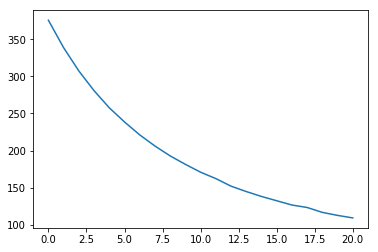

In [7]:
plt.plot(loss)

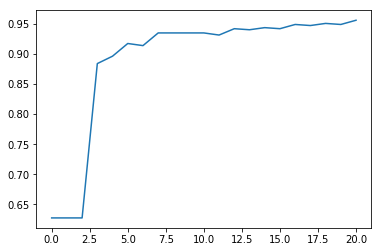

In [8]:
plt.plot(score)

In [9]:
score

array([0.62741652, 0.62741652, 0.62741652, 0.88400703, 0.89630931,
       0.91739895, 0.91388401, 0.93497364, 0.93497364, 0.93497364,
       0.93497364, 0.9314587 , 0.94200351, 0.94024605, 0.94376098,
       0.94200351, 0.94903339, 0.94727592, 0.95079086, 0.94903339,
       0.95606327])

# Reference

[sklearn.tree.DecisionTreeRegressor -- scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

[Understanding the decision tree structure -- scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)